# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [11]:
import os
os.getcwd()

'C:\\Users\\bhavesh\\upGrad\\Datasets and Dictionary-NYC\\Datasets and Dictionary'

In [15]:
os.chdir('C:\\Users\\bhavesh\\upGrad\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records')

In [17]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [19]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [46]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-09-01 00:15:37   2023-09-01 00:20:21              1.0   
1         2  2023-09-01 00:18:40   2023-09-01 00:30:28              2.0   
2         2  2023-09-01 00:35:01   2023-09-01 00:39:04              1.0   
3         2  2023-09-01 00:45:45   2023-09-01 00:47:37              1.0   
4         2  2023-09-01 00:01:23   2023-09-01 00:38:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.80         1.0                  N           163           230   
1           2.34         1.0                  N           236           233   
2           1.62         1.0                  N           162           236   
3           0.74         1.0                  N           141           229   
4           9.85         1.0                  N           138           230   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          6.5    3.5      0.5        0.00           0.0   
1             1         14.2    1.0      0.5        2.00           0.0   
2             1          8.6    1.0      0.5        2.00           0.0   
3             1          5.1    1.0      0.5        1.00           0.0   
4             1         45.0    6.0      0.5       17.02           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         11.50                   2.5         0.00  
1                    1.0         21.20                   2.5         0.00  
2                    1.0         15.60                   2.5         0.00  
3                    1.0         11.10                   2.5         0.00  
4                    1.0         73.77                   2.5         1.75

In [91]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:\\Users\\bhavesh\\upGrad\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
sampled_df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        #file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df['date'].unique():
            date_data = df[df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]

                # Sample 0.75% of the hourly data randomly
                if not hour_data.empty: 
                    sample = hour_data.sample(frac=0.0075, random_state=42)
                    
                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        sampled_df = pd.concat([sampled_df, sampled_data])

    except Exception as e:
        print(f"An error occurred while processing file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [93]:
# Store the df in csv/parquet
sampled_df.to_parquet('nyc_taxi.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [296]:
# Load the new data file
df = pd.read_parquet('nyc_taxi.parquet')


In [298]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
428               256             2  ...      0.5        0.00           0.0   
1113              237             1  ...      0.5        2.58           0.0   
819               141             2  ...      0.5        0.00           0.0   
3192              142             2  ...      0.5        0.00           0.0   
2995263           107             0  ...      0.5        5.93           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
428                        1.0         41.15                   0.0   
1113                       1.0         15.48                   2.5   
819                        1.0         16.40                   2.5   
3192                       1.0         11.50                   2.5   
2995263                    1.0         35.57                   NaN   

         airport_fee        date  hour Airport_fee  
428             1.25  2023-01-01     0         NaN  
1113            0.00  2023-01-01     0         NaN  
819             0.00  2023-01-01     0         NaN  
3192            0.00  2023-01-01     0         NaN  
2995263          NaN  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284492 entries, 428 to 2702874
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284492 non-null  int64         
 1   tpep_pickup_datetime   284492 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284492 non-null  datetime64[us]
 3   passenger_count        275065 non-null  float64       
 4   trip_distance          284492 non-null  float64       
 5   RatecodeID             275065 non-null  float64       
 6   store_and_fwd_flag     275065 non-null  object        
 7   PULocationID           284492 non-null  int64         
 8   DOLocationID           284492 non-null  int64         
 9   payment_type           284492 non-null  int64         
 10  fare_amount            284492 non-null  float64       
 11  extra                  284492 non-null  float64       
 12  mta_tax                284492 non-null  float6

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [304]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True)


In [306]:
df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1     1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2      819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3     3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4  2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              NaN          19.24         NaN               None   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...      0.5        0.00           0.0   
1           161           237  ...      0.5        2.58           0.0   
2           237           141  ...      0.5        0.00           0.0   
3           143           142  ...      0.5        0.00           0.0   
4            66           107  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN  

[5 rows x 23 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [309]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)

In [311]:
df.drop('Airport_fee', axis=1, inplace=True)
df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1     1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2      819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3     3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4  2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              NaN          19.24         NaN               None   

   PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...    6.0      0.5        0.00           0.0   
1           161           237  ...    1.0      0.5        2.58           0.0   
2           237           141  ...    1.0      0.5        0.00           0.0   
3           143           142  ...    1.0      0.5        0.00           0.0   
4            66           107  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN         0.00   

         date  hour  
0  2023-01-01     0  
1  2023-01-01     0  
2  2023-01-01     0  
3  2023-01-01     0  
4  2023-01-01     0  

[5 rows x 22 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [314]:
# check where values of fare amount are negative
df[df.fare_amount<0] # no 


Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [317]:
# Analyse RatecodeID for the negative fare amounts
df[df.fare_amount<0].RatecodeID


Series([], Name: RatecodeID, dtype: float64)

In [321]:
# Find which columns have negative values
df.describe()

index       VendorID        tpep_pickup_datetime  \
count  2.844920e+05  284492.000000                      284492   
mean   1.604444e+06       1.733349  2023-07-02 19:20:41.997792   
min    8.000000e+00       1.000000         2023-01-01 00:04:34   
25%    7.972398e+05       1.000000  2023-04-02 15:36:21.500000   
50%    1.594148e+06       2.000000         2023-06-27 15:13:50   
75%    2.392162e+06       2.000000  2023-10-06 19:15:56.500000   
max    3.521748e+06       6.000000         2023-12-31 23:54:03   
std    9.375697e+05       0.447582                         NaN   

            tpep_dropoff_datetime  passenger_count  trip_distance  \
count                      284492    275065.000000  284492.000000   
mean   2023-07-02 19:38:02.314909         1.367568       3.569540   
min           2023-01-01 00:09:40         0.000000       0.000000   
25%    2023-04-02 15:53:39.500000         1.000000       1.050000   
50%    2023-06-27 15:29:38.500000         1.000000       1.800000   
75%           2023-10-06 19:31:38         1.000000       3.400000   
max           2024-01-01 20:14:57         9.000000   22528.820000   
std                           NaN         0.890947      46.959114   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  275065.000000  284492.000000  284492.000000  284492.000000   
mean        1.656019     165.252106     163.953180       1.165094   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   
std         7.533037      64.049104      69.773988       0.506215   

         fare_amount          extra        mta_tax     tip_amount  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean       19.817924       1.587160       0.495332       3.544263   
min         0.000000      -2.500000      -0.500000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max       910.000000      14.250000       0.800000     150.290000   
std        18.203902       1.823747       0.048363       4.051388   

        tolls_amount  improvement_surcharge   total_amount  \
count  284492.000000          284492.000000  284492.000000   
mean        0.592555               0.998999      28.873147   
min         0.000000              -1.000000      -4.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max       143.000000               1.000000     911.000000   
std         2.175295               0.030565      22.760045   

       congestion_surcharge    airport_fee           hour  
count         275065.000000  284492.000000  284492.000000  
mean               2.308354       0.137703      14.264675  
min               -2.500000      -1.750000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000  
std                0.665327       0.456836       5.807753

In [329]:
# fix these negative values
df[df['extra']<0 ]= 0
df[df['mta_tax']<0] = 0
df[df['improvement_surcharge']<0] = 0
df[df['total_amount']<0] = 0
df[df['congestion_surcharge']<0] = 0
df[df['airport_fee']<0] = 0

In [ ]:
# ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

In [333]:
df.describe()

index       VendorID  passenger_count  trip_distance  \
count  2.844920e+05  284492.000000    275065.000000  284492.000000   
mean   1.604372e+06       1.733265         1.367513       3.569487   
std    9.376011e+05       0.447720         0.890988      46.959115   
min    0.000000e+00       0.000000         0.000000       0.000000   
25%    7.971968e+05       1.000000         1.000000       1.050000   
50%    1.594091e+06       2.000000         1.000000       1.800000   
75%    2.392126e+06       2.000000         1.000000       3.400000   
max    3.521748e+06       6.000000         9.000000   22528.820000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  275065.000000  284492.000000  284492.000000  284492.000000   
mean        1.655958     165.244798     163.944919       1.165003   
std         7.533044      64.056470      69.780977       0.506217   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean       19.817914       1.587169       0.495351       3.544263   
std        18.203913       1.823733       0.048064       4.051388   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max       910.000000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  284492.000000          284492.000000  284492.000000   
mean        0.592555               0.999034      28.873256   
std         2.175295               0.028667      22.759896   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max       143.000000               1.000000     911.000000   

       congestion_surcharge    airport_fee           hour  
count         275065.000000  284492.000000  284492.000000  
mean               2.308409       0.137716      14.264018  
std                0.665035       0.456808       5.808432  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [335]:
# Find the proportion of missing values in each column
df.isnull().mean()


index                    0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033136
trip_distance            0.000000
RatecodeID               0.033136
store_and_fwd_flag       0.033136
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033136
airport_fee              0.000000
date                     0.000000
hour                     0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [342]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df[df.passenger_count.isna()]

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
4       2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00   
15      2995167         2  2023-01-01 00:41:50   2023-01-01 01:14:50   
43      2995779         2  2023-01-01 01:46:00   2023-01-01 02:15:00   
44      2995445         2  2023-01-01 01:10:00   2023-01-01 01:41:00   
59      2995709         2  2023-01-01 01:18:30   2023-01-01 01:46:19   
...         ...       ...                  ...                   ...   
284343  2845847         1  2023-09-30 21:50:20   2023-09-30 22:06:38   
284405  2846107         1  2023-09-30 22:53:15   2023-09-30 23:10:04   
284447  2846509         2  2023-09-30 23:27:39   2023-09-30 23:43:22   
284466  2846616         1  2023-09-30 23:12:36   2023-09-30 23:36:35   
284483  2846281         1  2023-09-30 23:31:35   2023-09-30 23:41:26   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
4                   NaN          19.24         NaN               None   
15                  NaN          10.77         NaN               None   
43                  NaN           4.97         NaN               None   
44                  NaN           5.73         NaN               None   
59                  NaN           2.98         NaN               None   
...                 ...            ...         ...                ...   
284343              NaN           0.00         NaN               None   
284405              NaN           0.00         NaN               None   
284447              NaN           3.01         NaN               None   
284466              NaN           0.00         NaN               None   
284483              NaN           0.00         NaN               None   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
4                 66           107  ...    0.0      0.5        5.93   
15               151           106  ...    0.0      0.5       11.19   
43                50           226  ...    0.0      0.5        6.32   
44               186           255  ...    0.0      0.5        6.26   
59               137            48  ...    0.0      0.5        3.15   
...              ...           ...  ...    ...      ...         ...   
284343           249            87  ...    0.0      0.5        0.00   
284405            48           249  ...    0.0      0.5        0.00   
284447           163           262  ...    0.0      0.5        5.25   
284466           161            87  ...    0.0      0.5        0.00   
284483           249           231  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
43              0.00                    1.0         37.94   
44              0.00                    1.0         37.58   
59              0.00                    1.0         34.69   
...              ...                    ...           ...   
284343          0.00                    1.0         23.71   
284405          0.00                    1.0         25.88   
284447          0.00                    1.0         31.50   
284466          0.00                    1.0         35.01   
284483          0.00                    1.0         24.65   

        congestion_surcharge  airport_fee        date  hour  
4                        NaN          0.0  2023-01-01     0  
15                       NaN          0.0  2023-01-01     0  
43                       NaN          0.0  2023-01-01     1  
44                       NaN          0.0  2023-01-01     1  
59                       NaN          0.0  2023-01-01     1  
...                      ...          ...         ...   ...  
284343                   NaN          0.0  2023-09-30    21  
284405                   NaN          0.0  2023-09-30    22  
284447                   NaN          0.0  2023-09-30    23  
284466                   NaN          0.0  2023-09-30    23  


In [344]:
df.passenger_count = df.passenger_count.fillna(0)

In [346]:
df.passenger_count.isna().sum()

0

In [348]:
df.passenger_count.value_counts()

passenger_count
1.0    207247
2.0     41391
0.0     13814
3.0     10386
4.0      5709
5.0      3547
6.0      2393
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

In [350]:
df= df[df['passenger_count'] != 0]

In [352]:
df.passenger_count.value_counts()

passenger_count
1.0    207247
2.0     41391
3.0     10386
4.0      5709
5.0      3547
6.0      2393
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [354]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [356]:
# handle null values in congestion_surcharge
df.congestion_surcharge.isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [358]:
# Handle any remaining missing values
df.isnull().sum()


index                    0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [360]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


index       VendorID  passenger_count  trip_distance  \
count  2.706780e+05  270678.000000    270678.000000  270678.000000   
mean   1.551320e+06       1.748421         1.389677       3.450469   
std    9.060932e+05       0.433922         0.880866       4.542453   
min    8.000000e+00       1.000000         1.000000       0.000000   
25%    7.709548e+05       1.000000         1.000000       1.060000   
50%    1.541885e+06       2.000000         1.000000       1.790000   
75%    2.312518e+06       2.000000         1.000000       3.380000   
max    3.411775e+06       2.000000         9.000000     187.350000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  270678.000000  270678.000000  270678.000000  270678.000000   
mean        1.664217     165.361832     164.185316       1.204243   
std         7.584072      63.759283      69.743270       0.464744   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  270678.000000  270678.000000  270678.000000  270678.000000   
mean       19.772351       1.609871       0.495401       3.581413   
std        18.355802       1.823447       0.047804       4.074997   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.860000   
75%        21.900000       2.500000       0.500000       4.460000   
max       910.000000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  270678.000000          270678.000000  270678.000000   
mean        0.595827               0.999352      28.905849   
std         2.179215               0.023515      22.966986   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.700000   
max       143.000000               1.000000     911.000000   

       congestion_surcharge    airport_fee           hour  
count         270678.000000  270678.000000  270678.000000  
mean               2.308232       0.143297      14.303135  
std                0.665318       0.465129       5.782674  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [362]:
# remove passenger_count > 6
df = df[df.passenger_count<=6]

In [364]:
df.describe()

index       VendorID  passenger_count  trip_distance  \
count  2.706730e+05  270673.000000    270673.000000  270673.000000   
mean   1.551309e+06       1.748416         1.389559       3.450353   
std    9.060902e+05       0.433924         0.880437       4.542083   
min    8.000000e+00       1.000000         1.000000       0.000000   
25%    7.709490e+05       1.000000         1.000000       1.060000   
50%    1.541874e+06       2.000000         1.000000       1.790000   
75%    2.312516e+06       2.000000         1.000000       3.380000   
max    3.411775e+06       2.000000         6.000000     187.350000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  270673.000000  270673.000000  270673.000000  270673.000000   
mean        1.664156     165.362282     164.185153       1.204246   
std         7.584129      63.759011      69.742602       0.464747   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  270673.000000  270673.000000  270673.000000  270673.000000   
mean       19.771165       1.609901       0.495404       3.581357   
std        18.353881       1.823451       0.047785       4.074909   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.860000   
75%        21.900000       2.500000       0.500000       4.460000   
max       910.000000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  270673.000000          270673.000000  270673.000000   
mean        0.595664               0.999352      28.904493   
std         2.178608               0.023515      22.964918   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.700000   
max       143.000000               1.000000     911.000000   

       congestion_surcharge    airport_fee           hour  
count         270673.000000  270673.000000  270673.000000  
mean               2.308256       0.143299      14.303248  
std                0.665279       0.465133       5.782601  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [366]:
# Continue with outlier handling
df = df[df.RatecodeID<=7]


In [368]:
df.describe()

index       VendorID  passenger_count  trip_distance  \
count  2.690440e+05  269044.000000    269044.000000  269044.000000   
mean   1.551337e+06       1.752944         1.391891       3.431057   
std    9.060876e+05       0.431301         0.882530       4.526687   
min    8.000000e+00       1.000000         1.000000       0.000000   
25%    7.709228e+05       2.000000         1.000000       1.060000   
50%    1.541878e+06       2.000000         1.000000       1.780000   
75%    2.312655e+06       2.000000         1.000000       3.350000   
max    3.411775e+06       2.000000         6.000000     187.350000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  269044.000000  269044.000000  269044.000000  269044.000000   
mean        1.074809     165.586376     164.391497       1.205476   
std         0.393963      63.626650      69.665273       0.465875   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     114.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max         5.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  269044.000000  269044.000000  269044.000000  269044.000000   
mean       19.690769       1.619641       0.495384       3.603027   
std        18.348100       1.824646       0.047890       4.077664   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.870000   
75%        21.900000       2.500000       0.500000       4.480000   
max       910.000000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  269044.000000          269044.000000  269044.000000   
mean        0.589682               0.999363      28.860726   
std         2.166724               0.023269      22.993520   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.600000   
max       143.000000               1.000000     911.000000   

       congestion_surcharge    airport_fee           hour  
count         269044.000000  269044.000000  269044.000000  
mean               2.322232       0.144167      14.322646  
std                0.642511       0.466405       5.785413  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [378]:
# Do any columns need standardising?
df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1   1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2    819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3   3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
5   4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
5              2.0           7.10         1.0                  N   

   PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...    6.0      0.5        0.00           0.0   
1           161           237  ...    1.0      0.5        2.58           0.0   
2           237           141  ...    1.0      0.5        0.00           0.0   
3           143           142  ...    1.0      0.5        0.00           0.0   
5           246            37  ...    3.5      0.5        7.90           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
5                    1.0         47.40                   2.5         0.00   

         date  hour  
0  2023-01-01     0  
1  2023-01-01     0  
2  2023-01-01     0  
3  2023-01-01     0  
5  2023-01-01     0  

[5 rows x 22 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [376]:
df.columns.tolist()

['index',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269044 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  269044 non-null  int64  
 1   VendorID               269044 non-null  int64  
 2   tpep_pickup_datetime   269044 non-null  object 
 3   tpep_dropoff_datetime  269044 non-null  object 
 4   passenger_count        269044 non-null  float64
 5   trip_distance          269044 non-null  float64
 6   RatecodeID             269044 non-null  float64
 7   store_and_fwd_flag     269044 non-null  object 
 8   PULocationID           269044 non-null  int64  
 9   DOLocationID           269044 non-null  int64  
 10  payment_type           269044 non-null  int64  
 11  fare_amount            269044 non-null  float64
 12  extra                  269044 non-null  float64
 13  mta_tax                269044 non-null  float64
 14  tip_amount             269044 non-null  f

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: 
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

####  
Categorical: [
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'date',
 'hour']

 Numerical: [
 'passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [410]:
df.hour.value_counts().sort_index()

hour
0      7591
1      5080
2      3322
3      2167
4      1383
5      1400
6      3485
7      7121
8      9926
9     11391
10    12446
11    13567
12    14745
13    15229
14    16408
15    16773
16    16779
17    18222
18    19041
19    17136
20    15325
21    15257
22    14147
23    11103
Name: count, dtype: int64

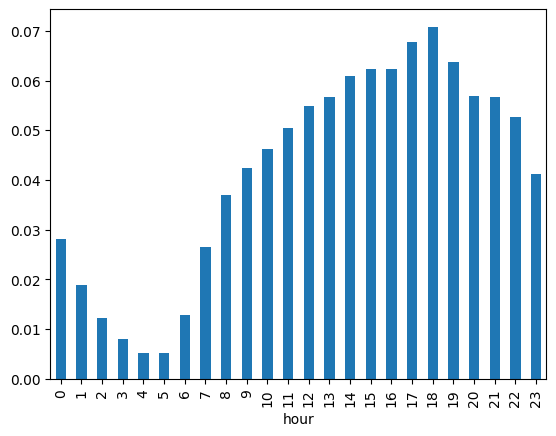

In [412]:
# Find and show the hourly trends in taxi pickups
df.hour.value_counts(normalize=True).sort_index().plot.bar()
plt.show()

In [448]:
# Find and show the daily trends in taxi pickups (days of the week)
df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day_name()

In [450]:
df.day.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [454]:
df.day.value_counts()


day
Thursday     42239
Wednesday    41361
Friday       39869
Saturday     39145
Tuesday      39034
Sunday       33867
Monday       33529
Name: count, dtype: int64

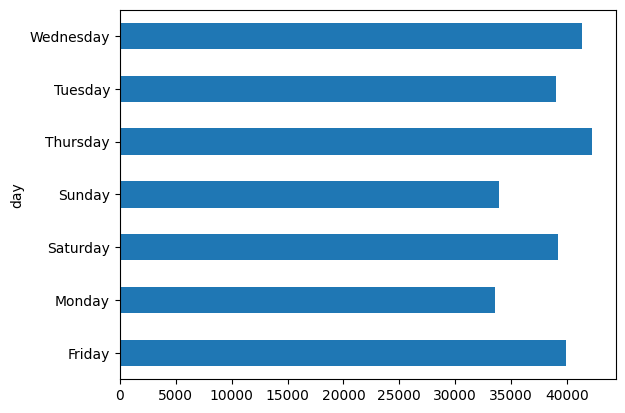

In [458]:
df.day.value_counts().sort_index().plot.barh()
plt.show()

In [460]:
# Show the monthly trends in pickups
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month_name()

In [488]:
df.month.value_counts()

month
May          24762
October      24511
March        24052
June         23381
November     23288
April        23284
December     23170
January      21818
February     20690
July         20516
August       19838
September    19656
Name: count, dtype: int64

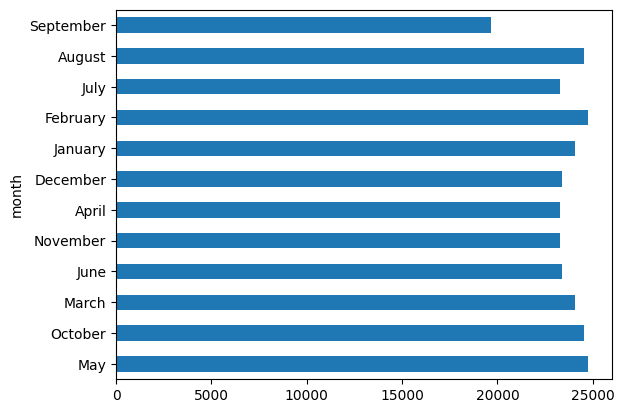

In [470]:
df.month.value_counts().plot.barh()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [474]:
# Analyse the above parameters
df1 = df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']]
df1.describe() #They do not contain negative values, but have zeroes

fare_amount     tip_amount   total_amount  trip_distance
count  269044.000000  269044.000000  269044.000000  269044.000000
mean       19.690769       3.603027      28.860726       3.431057
std        18.348100       4.077664      22.993520       4.526687
min         0.000000       0.000000       0.000000       0.000000
25%         9.300000       1.000000      15.960000       1.060000
50%        13.500000       2.870000      21.000000       1.780000
75%        21.900000       4.480000      30.600000       3.350000
max       910.000000     150.290000     911.000000     187.350000

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [478]:
df1.fare_amount.value_counts().sort_index()

fare_amount
0.00      78
0.01      14
0.02       1
0.05       1
0.20       1
          ..
417.00     1
455.20     1
500.00     1
600.00     1
910.00     1
Name: count, Length: 857, dtype: int64

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [484]:
# Create a df with non zero entries for the selected parameters.
df = df[(df.fare_amount!=0) | (df.total_amount!=0)]
#tip amount and trip distance can be 0 

In [486]:
df.describe()

index       VendorID  passenger_count  trip_distance  \
count  2.689660e+05  268966.000000    268966.000000  268966.000000   
mean   1.551328e+06       1.753051         1.391957       3.430828   
min    8.000000e+00       1.000000         1.000000       0.000000   
25%    7.708952e+05       2.000000         1.000000       1.060000   
50%    1.541891e+06       2.000000         1.000000       1.780000   
75%    2.312676e+06       2.000000         1.000000       3.350000   
max    3.411775e+06       2.000000         6.000000     187.350000   
std    9.060966e+05       0.431238         0.882572       4.523953   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  268966.000000  268966.000000  268966.000000  268966.000000   
mean        1.074389     165.585725     164.385335       1.205149   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000     132.000000     114.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max         5.000000     265.000000     265.000000       4.000000   
std         0.391940      63.626591      69.663175       0.465213   

         fare_amount          extra        mta_tax     tip_amount  \
count  268966.000000  268966.000000  268966.000000  268966.000000   
mean       19.696479       1.619991       0.495489       3.603057   
min         0.010000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.880000   
75%        21.900000       2.500000       0.500000       4.480000   
max       910.000000      14.250000       0.800000     150.290000   
std        18.347696       1.824604       0.047351       4.069453   

        tolls_amount  improvement_surcharge   total_amount  \
count  268966.000000          268966.000000  268966.000000   
mean        0.589383               0.999482      28.867138   
min         0.000000               0.000000       1.010000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.600000   
max       143.000000               1.000000     911.000000   
std         2.164794               0.020561      22.991661   

       congestion_surcharge    airport_fee                           date  \
count         268966.000000  268966.000000                         268966   
mean               2.322766       0.144146  2023-07-01 07:21:10.652795904   
min                0.000000       0.000000            2023-01-01 00:00:00   
25%                2.500000       0.000000            2023-04-01 00:00:00   
50%                2.500000       0.000000            2023-06-26 00:00:00   
75%                2.500000       0.000000            2023-10-05 00:00:00   
max                2.500000       1.750000            2023-12-31 00:00:00   
std                0.641619       0.466369                            NaN   

                hour  
count  268966.000000  
mean       14.322981  
min         0.000000  
25%        11.000000  
50%        15.000000  
75%        19.000000  
max        23.000000  
std         5.785625

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [498]:
# Group data by month and analyse monthly revenue
df.groupby('month').total_amount.sum()


month
April        666749.85
August       575721.67
December     672370.17
February     568072.53
January      598821.78
July         591137.73
June         686519.46
March        678759.46
May          727177.01
November     672531.32
October      732399.77
September    594017.95
Name: total_amount, dtype: float64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [506]:
# Calculate proportion of each quarter
df['quarter'] = df['date'].dt.quarter
df.quarter.value_counts(normalize=True).sort_index()

quarter
1    0.247466
2    0.265561
3    0.223114
4    0.263859
Name: proportion, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [516]:
# Show how trip fare is affected by distance
df1 = df[df['trip_distance']!=0][['trip_distance', 'fare_amount']]
df1.corr()


trip_distance  fare_amount
trip_distance       1.000000     0.944307
fare_amount         0.944307     1.000000

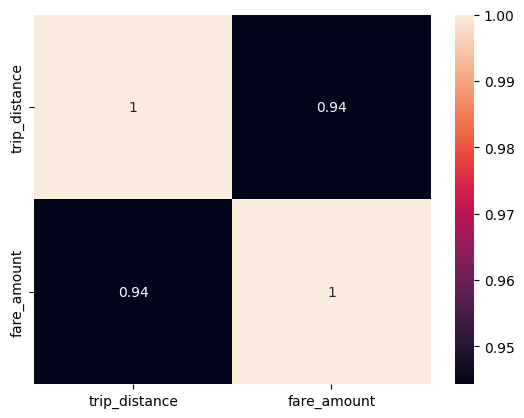

In [522]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [552]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration']  = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [564]:
# Show relationship between fare and trip duration
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration']  = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [566]:
df1 = df[['fare_amount', 'trip_duration']]
df1.head()

fare_amount   trip_duration
0         32.4 0 days 00:15:57
1          7.9 0 days 00:05:05
2         11.4 0 days 00:10:33
3          6.5 0 days 00:05:25
5         34.5 0 days 00:33:37

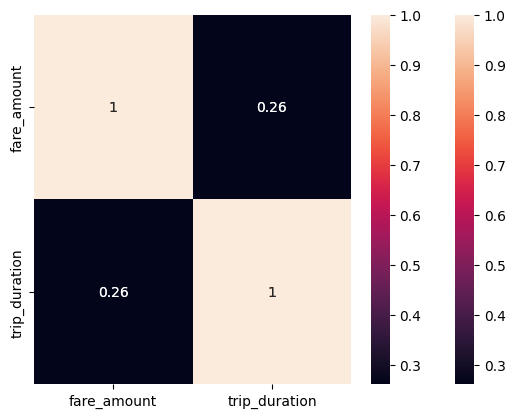

In [570]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [574]:
# Show relationship between fare and number of passengers
df1 = df[['fare_amount', 'passenger_count']]
df1.head()


fare_amount  passenger_count
0         32.4              1.0
1          7.9              2.0
2         11.4              3.0
3          6.5              1.0
5         34.5              2.0

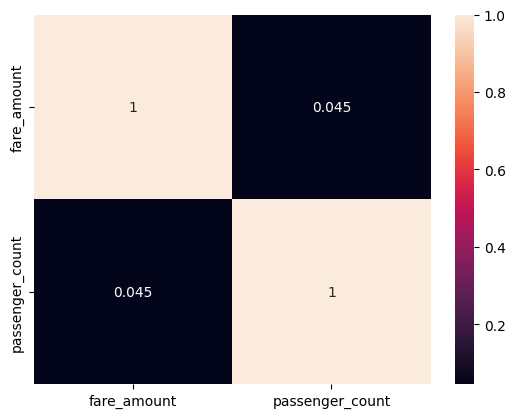

In [576]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [578]:
# Show relationship between tip and trip distance
df1 = df[['tip_amount', 'trip_distance']]
df1.head()


tip_amount  trip_distance
0        0.00           7.74
1        2.58           1.24
2        0.00           1.44
3        0.00           0.54
5        7.90           7.10

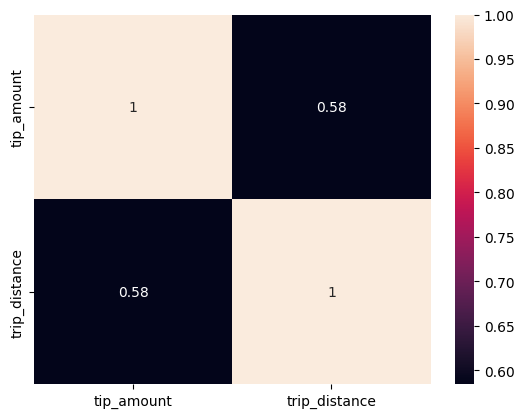

In [580]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [582]:
# Analyse the distribution of different payment types (payment_type).
df.payment_type.value_counts(normalize=True)

payment_type
1    0.814084
2    0.174130
4    0.007447
3    0.004339
Name: proportion, dtype: float64

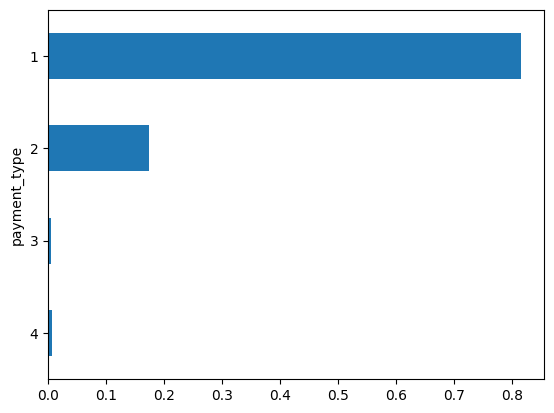

In [592]:
df.payment_type.value_counts(normalize=True).sort_index(ascending=False).plot.barh()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [596]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 1.1 MB/s eta 0:00:14
   - -------------------------------------- 0.5/16.2 MB 1.1 MB/s eta 0:00:14
   - -------------------------------------- 0.8/16.2 MB 838.9 kB/s eta 0:00:19
   -- ------------------------------------- 1.0/16.2 MB 986.7 kB/s eta 0:00:16
   --- ------------------------------------ 1.3/16.2 MB 1.1 MB/s eta 0:00:14
   ---- ----------------------------------- 1.8/16.2 MB 1.3 MB/s eta 0:00:12
   ----- ---------------------------------- 2.4/16.2 MB 1.4 MB/s eta 0:00:10
   ------- -------------------------------- 2.9/16.2 MB 1.6 MB/s eta 0:00:09
   -------- ------------------------------- 3.4/16.2 MB 1.7 MB/s eta 0:00:08
   ---------- ----------------------------- 4.2/16.2 MB 1.9 MB/s eta 0:00:07
   ----------- ---------------------------- 4.7/16.2 MB 2.0 MB/s eta 0:00:06
   ------

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [600]:
os.getcwd()

'C:\\Users\\bhavesh\\upGrad\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records'

In [602]:
os.chdir('C:\\Users\\bhavesh\\upGrad\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\taxi_zones')

In [604]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [623]:
print(zones.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


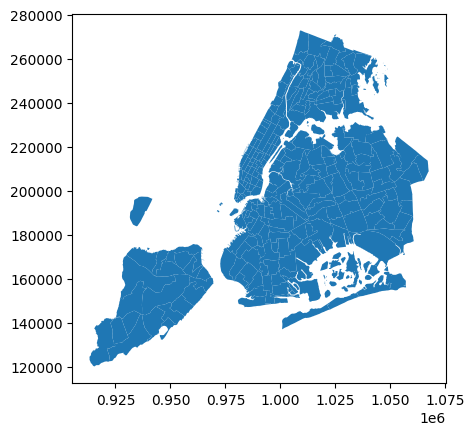

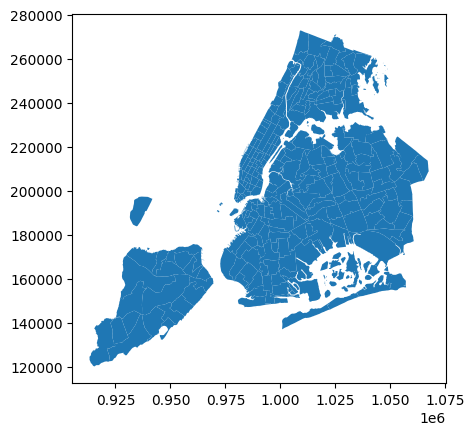

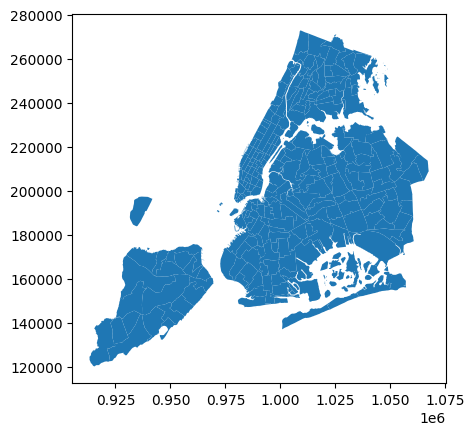

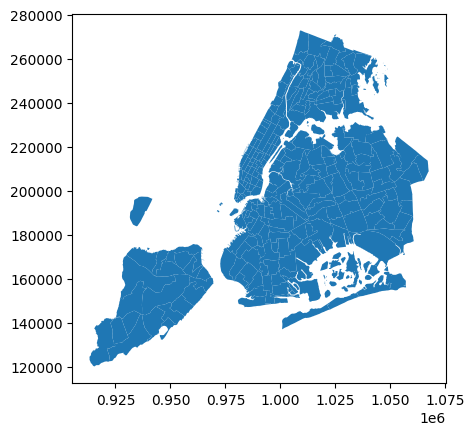

In [629]:
zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.

**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [635]:
# Merge zones and trip records using locationID and PULocationID
df1 = pd.merge(df, zones, 'inner', left_on='PULocationID', right_on= 'LocationID')
df1.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1   1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2    819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3   3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4   4719         1  2023-01-01 00:42:56   2023-01-01 01:16:33   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              2.0           7.10         1.0                  N   

   PULocationID  DOLocationID  ...    month  quarter   trip_duration  \
0           138           256  ...  January        1 0 days 00:15:57   
1           161           237  ...  January        1 0 days 00:05:05   
2           237           141  ...  January        1 0 days 00:10:33   
3           143           142  ...  January        1 0 days 00:05:25   
4           246            37  ...  January        1 0 days 00:33:37   

   OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
0       138    0.107467    0.000537          LaGuardia Airport         138   
1       161    0.035804    0.000072             Midtown Center         161   
2       237    0.042213    0.000096      Upper East Side South         237   
3       143    0.054180    0.000151        Lincoln Square West         143   
4       246    0.069467    0.000281  West Chelsea/Hudson Yards         246   

     borough                                           geometry  
0     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  Manhattan  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  Manhattan  POLYGON ((983031.177 217138.506, 983640.32 216...  

[5 rows x 33 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [685]:
# Group data by location and calculate the number of trips
loc_trip = pd.DataFrame(df1.LocationID.value_counts())
loc_trip.reset_index()


LocationID  count
0           132  14364
1           237  12773
2           161  12664
3           236  11418
4           162   9812
..          ...    ...
208         154      1
209         222      1
210          98      1
211         185      1
212           9      1

[213 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [689]:
# Merge trip counts back to the zones GeoDataFrame
zones1 = pd.merge(zones, loc_trip, on='LocationID', how='inner')
zones1.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2         4    0.043567    0.000112            Alphabet City           4   
3         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
4         7    0.107417    0.000390                  Astoria           7   

         borough                                           geometry  count  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...     38  
1          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...      1  
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...    260  
3  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...      3  
4         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...    112

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

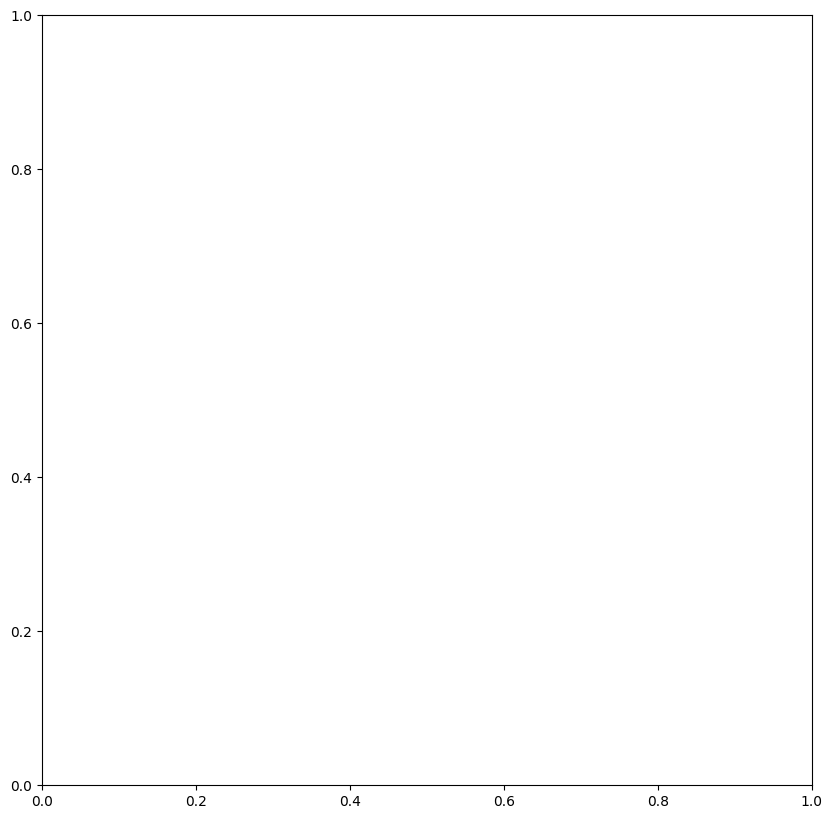

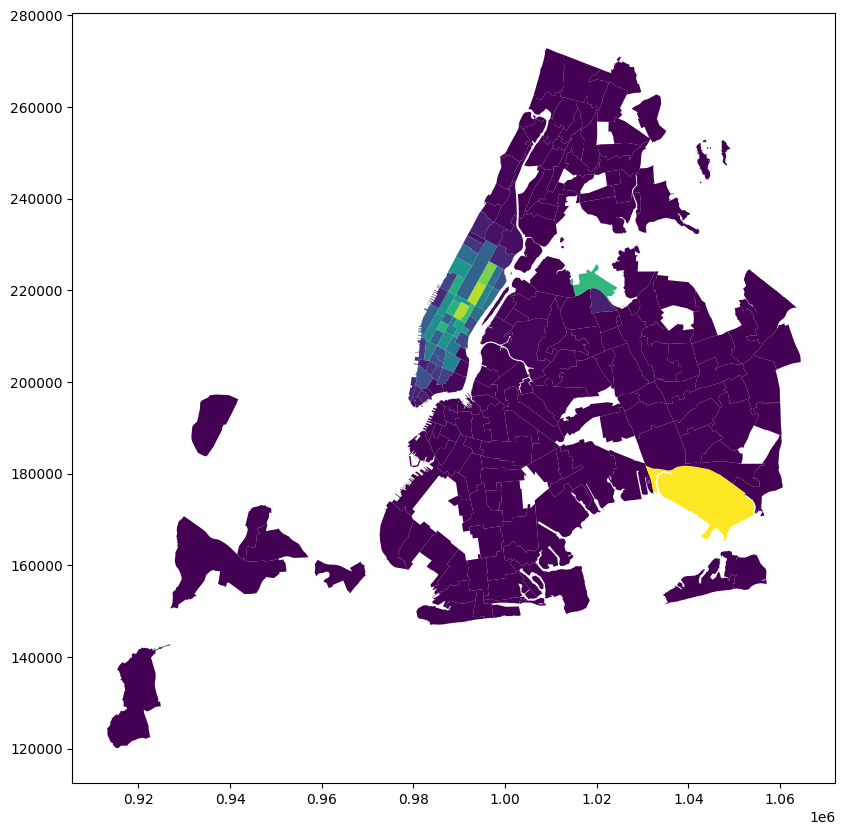

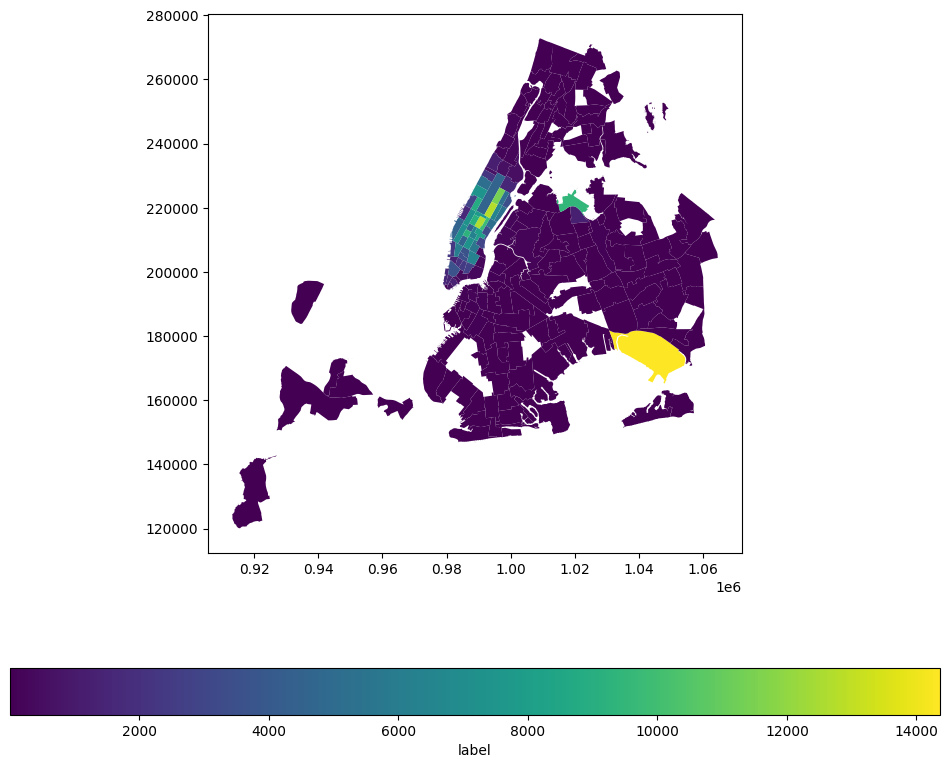

In [701]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones1.plot(column = 'count',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': 'horizontal'})
plt.show()

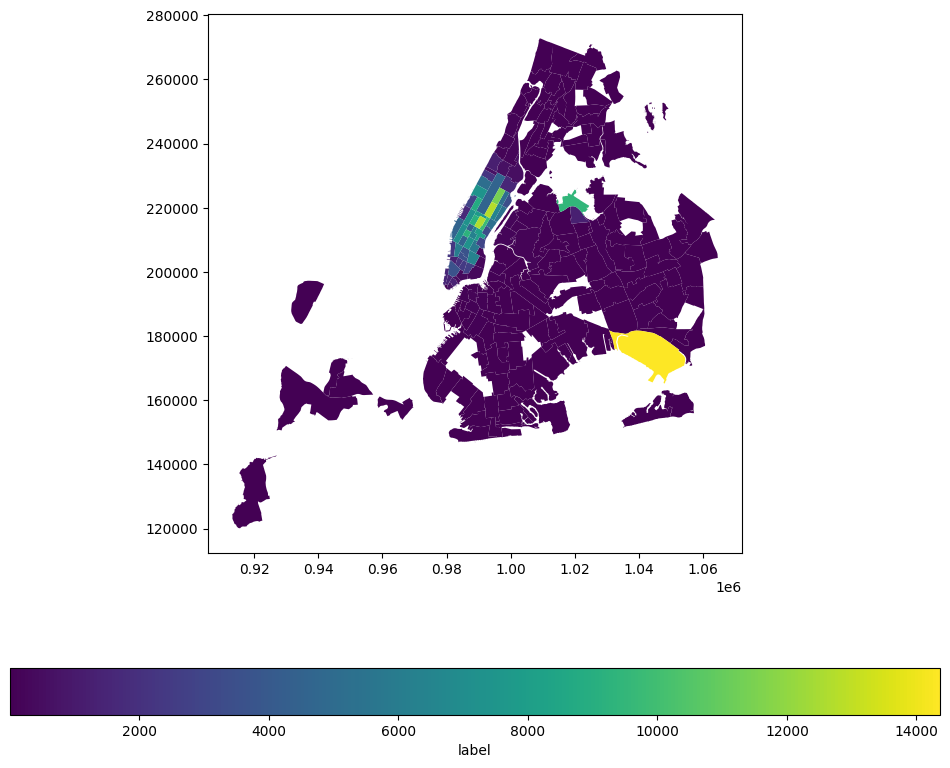

In [704]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones1.sort_values(by='count', ascending=True).plot(column = 'count', 
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': 'horizontal'})
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [737]:
# Find routes which have the slowest speeds at different times of the day
df1['trip_duration_seconds'] = df1['trip_duration'].dt.total_seconds()

In [747]:
df1.groupby(['LocationID', 'hour']).trip_duration_seconds.mean().sort_values(ascending=False)

LocationID  hour
260         17      43272.000
226         18      41132.875
181         20      23024.250
131         18      18736.000
261         5       14589.400
                      ...    
49          23          3.000
42          3           3.000
37          22          3.000
197         8           1.000
62          4           0.000
Name: trip_duration_seconds, Length: 2497, dtype: float64

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [902]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour  = df1.groupby('hour').count()

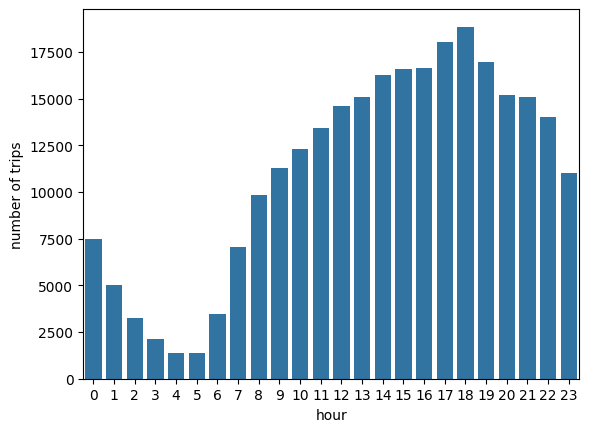

In [900]:
sns.barplot(trips_per_hour, x='hour', y='index')
plt.ylabel('number of trips')
plt.show()

In [919]:
#busiest hour and number of trips
trips_per_hour1  = df1.groupby('hour').hour.count().sort_values(ascending=False)
trips_per_hour1.head(1)

hour
18    18847
Name: hour, dtype: int64

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [921]:
trips_per_hour1.head(5)

hour
18    18847
17    18025
19    16966
16    16619
15    16607
Name: hour, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [937]:
# Compare traffic trends for the week days and weekends
weekday = df1[(df1.day != 'Saturday') & (df1.day != 'Sunday')]
weekend = df1[(df1.day == 'Saturday') | (df1.day == 'Sunday')]

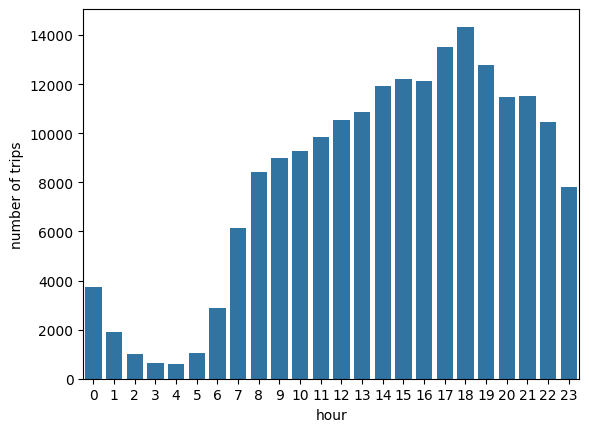

In [947]:
#weekday
weekday_trips  = weekday.groupby('hour').count()

sns.barplot(weekday_trips, x='hour', y='index')
plt.ylabel('number of trips')
plt.show()

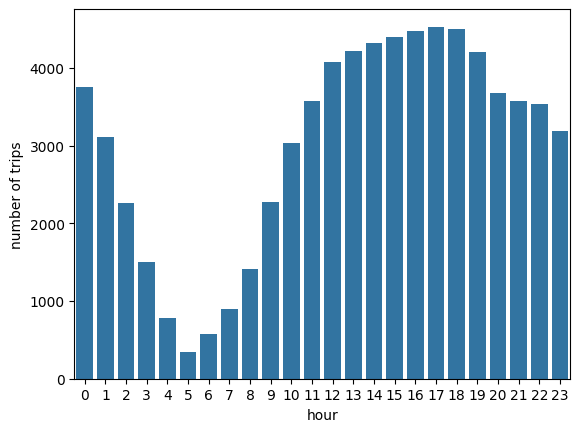

In [949]:
#weekend
weekend_trips  = weekend.groupby('hour').count()

sns.barplot(weekend_trips, x='hour', y='index')
plt.ylabel('number of trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [953]:
# Find top 10 pickup and dropoff zones
zones1.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2         4    0.043567    0.000112            Alphabet City           4   
3         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
4         7    0.107417    0.000390                  Astoria           7   

         borough                                           geometry  count  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...     38  
1          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...      1  
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...    260  
3  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...      3  
4         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...    112

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [999]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
bottom10 = zones1.groupby('zone')['count'].sum().sort_values(ascending=True).head(10)
bottom10

zone
Allerton/Pelham Gardens             1
City Island                         1
Queensboro Hill                     1
Port Richmond                       1
East Concourse/Concourse Village    1
East Flatbush/Farragut              1
East Tremont                        1
Woodlawn/Wakefield                  1
Far Rockaway                        1
Westerleigh                         1
Name: count, dtype: int64

In [1001]:
top10 = zones1.groupby('zone')['count'].sum().sort_values(ascending=True).tail(10)
top10

zone
Murray Hill                      7980
Lincoln Square East              8824
Times Sq/Theatre District        9104
Penn Station/Madison Sq West     9231
LaGuardia Airport                9464
Midtown East                     9812
Upper East Side North           11418
Midtown Center                  12664
Upper East Side South           12773
JFK Airport                     14364
Name: count, dtype: int64

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1031]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = df1[~(df1['hour']>5) & (df1['hour']<23)]


In [1055]:
df2 = pd.concat([df1, zones1], keys=['LocationID', 'LocationID'])

In [1058]:
nightbottom10 = df2.groupby('zone')['count'].sum().sort_values(ascending=True).head(10)
nightbottom10

zone
Allerton/Pelham Gardens             1.0
City Island                         1.0
Queensboro Hill                     1.0
Port Richmond                       1.0
East Concourse/Concourse Village    1.0
East Flatbush/Farragut              1.0
East Tremont                        1.0
Woodlawn/Wakefield                  1.0
Far Rockaway                        1.0
Westerleigh                         1.0
Name: count, dtype: float64

In [1062]:
nighttop10 = df2.groupby('zone')['count'].sum().sort_values(ascending=True).tail(10)
nighttop10

zone
Murray Hill                      7980.0
Lincoln Square East              8824.0
Times Sq/Theatre District        9104.0
Penn Station/Madison Sq West     9231.0
LaGuardia Airport                9464.0
Midtown East                     9812.0
Upper East Side North           11418.0
Midtown Center                  12664.0
Upper East Side South           12773.0
JFK Airport                     14364.0
Name: count, dtype: float64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [1066]:
# Filter for night hours (11 PM to 5 AM)
night_hours.total_amount.sum() #nighttime revenue


595191.29

In [1086]:
dayhours = df1[(df1['hour']>5) & (df1['hour']<23)]

In [1088]:
dayhours.hour.unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [1090]:
dayhours.total_amount.sum() #day time revenue

6732494.499999998

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [1104]:
# Analyse the fare per mile per passenger for different passenger counts
df1.fare_amount.mean()/df1.trip_distance.mean()

5.722663076417545

In [1102]:
df1.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'day', 'month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'trip_duration_seconds'],
      dtype='object')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [1122]:
# Compare the average fare per mile for different days and for different times of the day
df1.groupby(['day','hour'])['fare_amount'].mean()/df1.groupby(['day','hour'])['trip_distance'].mean()


day        hour
Friday     0       5.215809
           1       5.057084
           2       5.412686
           3       5.005067
           4       4.865552
                     ...   
Wednesday  19      5.675212
           20      5.488949
           21      5.349992
           22      5.299397
           23      4.952492
Length: 168, dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [1136]:
# Compare fare per mile for different vendors
df1.groupby('VendorID')['fare_amount'].mean()/df1.groupby('VendorID')['trip_distance'].mean()


VendorID
1    5.793939
2    5.701654
dtype: float64

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [1148]:
# Defining distance tiers
bins = [0,2,5,9999]
labels = ['0-2', '2-5','>5']
df1['tier'] = pd.cut(df1.trip_distance, bins = bins, labels=labels)


In [1152]:
df1.groupby('tier')['fare_amount'].mean()/df1.groupby('tier')['trip_distance'].mean()

tier
0-2    8.851103
2-5    6.365801
>5     4.297628
dtype: float64

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

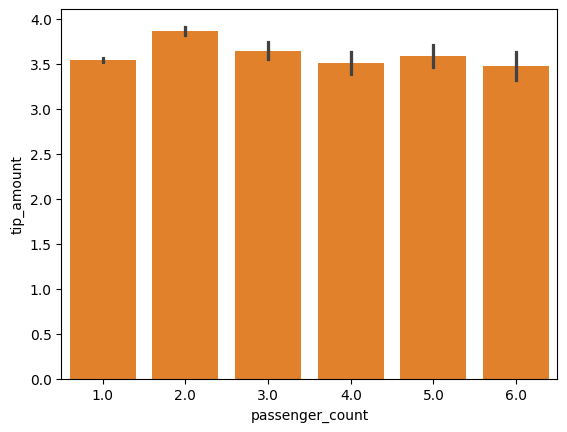

In [1158]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
sns.barplot(df1, x='passenger_count', y='tip_amount') #tip based on passenger count
plt.show()

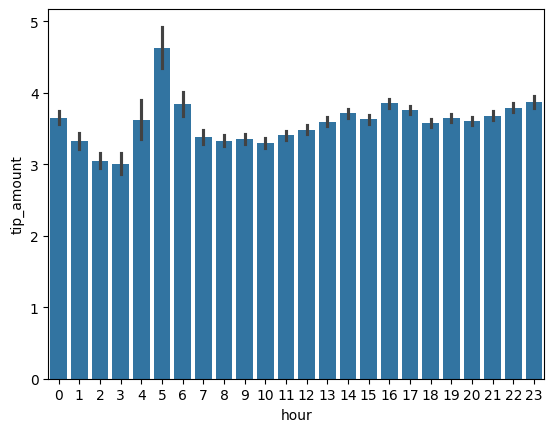

In [1160]:
sns.barplot(df1, x='hour', y='tip_amount') #tip based on pickup time
plt.show()

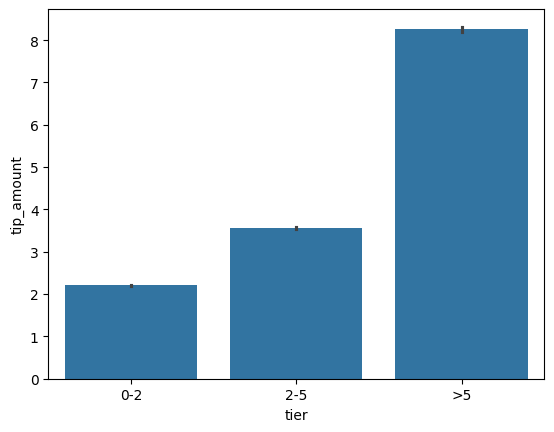

In [1162]:
sns.barplot(df1, x='tier', y='tip_amount') #tip based on distances
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [1166]:
# See how passenger count varies across hours and days
df1.groupby(['hour', 'day'])['passenger_count'].sum()



hour  day      
0     Friday       1610.0
      Monday        741.0
      Saturday     2692.0
      Sunday       2789.0
      Thursday     1098.0
                    ...  
23    Saturday     3413.0
      Sunday       1426.0
      Thursday     2486.0
      Tuesday      1840.0
      Wednesday    2101.0
Name: passenger_count, Length: 168, dtype: float64

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [1174]:
# How does passenger count vary across zones
df1.groupby(['zone'])['passenger_count'].sum()


zone
Allerton/Pelham Gardens       2.0
Alphabet City               361.0
Arrochar/Fort Wadsworth       6.0
Astoria                     135.0
Auburndale                    1.0
                            ...  
Woodlawn/Wakefield            1.0
Woodside                     62.0
World Trade Center         2203.0
Yorkville East             4513.0
Yorkville West             6909.0
Name: passenger_count, Length: 213, dtype: float64

In [1176]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
df1.groupby(['zone'])['passenger_count'].mean()


zone
Allerton/Pelham Gardens    2.000000
Alphabet City              1.388462
Arrochar/Fort Wadsworth    2.000000
Astoria                    1.205357
Auburndale                 1.000000
                             ...   
Woodlawn/Wakefield         1.000000
Woodside                   1.347826
World Trade Center         1.548138
Yorkville East             1.314594
Yorkville West             1.338953
Name: passenger_count, Length: 213, dtype: float64

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [1180]:
# How often is each surcharge applied?
df1['total_surcharge'] = df1['congestion_surcharge']+df1['improvement_surcharge']

In [1192]:
df1.groupby(['zone'])['total_surcharge'].mean()

zone
Allerton/Pelham Gardens    1.000000
Alphabet City              3.490385
Arrochar/Fort Wadsworth    1.000000
Astoria                    1.558036
Auburndale                 1.000000
                             ...   
Woodlawn/Wakefield         1.000000
Woodside                   1.739130
World Trade Center         3.468377
Yorkville East             3.493446
Yorkville West             3.475446
Name: total_surcharge, Length: 213, dtype: float64

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

#####  Demand is highest in the Midtown East, Upper East Side North, Midtown Center, Upper East Side South, JFK Airport area and hence, based on the demand the numbers of cabs should be maximum near these areas.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

##### Based on time - Allerton/Pelham Gardens
##### Based on days and month - JFK Airport on Thursday

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

##### Based on the below the data pricing should be kept at par with the below vendors to be in the competition
VendorID<br>
1    5.793939<br>
2    5.701654